In [2]:
import numpy as np
import os
from rcv_distribution import *

c:\Users\mahsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Hawaii_05232020_PresidentoftheUnitedStateCD1


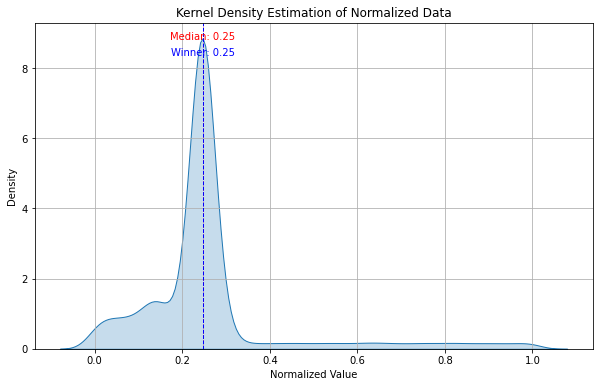

(0.24716806505014882, 0.24716806505014882)


In [70]:
filename = "Hawaii_05232020_PresidentoftheUnitedStateCD1"

print(filename)
print(plot_median_and_winner_normalized(filename, show=True))

In [11]:
def plot_median_and_winner_normalized(filename, show=False):
    #filename that you pass here should be without the .csv or .npy

    # Load the winner's data
    winners = pd.read_csv("diff.csv")
    winner = winners.loc[winners["filename"] == (filename + ".csv"), "IRV1"].tolist()[0]
    print(winner)

    # Load the positions data
    df = pd.read_csv("null_elections/" + filename + ".csv")

    # Load the distributed points
    distributed_points = np.load("np_data/" + filename + ".npy")

    # Normalize the distributed points
    min_position = np.min(distributed_points)
    max_position = np.max(distributed_points)
    normalized_points = (distributed_points - min_position) / (max_position - min_position)

    # Calculate the median of the normalized points
    median_value = np.median(normalized_points)

    # Normalize the positions in the dataframe
    df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)

    # Get the winner's normalized position
    winner_position = df.loc[df["candidate"] == winner, "normalized_position"].tolist()[0]

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.kdeplot(normalized_points, fill=True)
    plt.title('Kernel Density Estimation of Normalized Data')
    plt.xlabel('Normalized Value')
    plt.ylabel('Density')
    plt.grid(True)

    # Mark the median on the x-axis
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)
    plt.text(median_value, plt.gca().get_ylim()[1] * 0.95, f'Median: {median_value:.2f}', color='red', ha='center')

    # Mark the winner on the x-axis
    plt.axvline(winner_position, color='blue', linestyle='dashed', linewidth=1)
    plt.text(winner_position, plt.gca().get_ylim()[1] * 0.90, f'Winner: {winner_position:.2f}', color='blue', ha='center')

    if show is False:
        plt.close()
    else:
        plt.show()
    return winner_position, median_value

In [12]:
plot_median_and_winner_normalized(filename, show=False)

Johnson, Craig W.


(1.0, 0.15442830201995567)

In [3]:
candidate_positions_file = pd.read_csv("null_elections/" + filename + ".csv")
positions = pd.Series(candidate_positions_file['position'].values, index=candidate_positions_file['candidate']).to_dict()
print(positions)

n = len(positions)
normalized_positions = {key: value / (n - 1) for key, value in positions.items()}

print(normalized_positions)

{'Golden, Jared Forrest': 2.0, 'Bond, Tiffany': 1.1196740122625028, 'Poliquin, Bruce': 0.0}
{'Golden, Jared Forrest': 1.0, 'Bond, Tiffany': 0.5598370061312514, 'Poliquin, Bruce': 0.0}


In [3]:
def find_closest_key_value(dictionary, target):
    # Extract the dictionary items (key-value pairs)
    items = dictionary.items()
    # Compute the closest key-value pair based on the minimum difference
    closest_key, closest_value = min(items, key=lambda item: abs(item[1] - target))
    return closest_key, closest_value

# Find the closest key and value in the dictionary
closest_key, closest_value = find_closest_key_value(normalized_positions, plot_median_and_winner_normalized(filename, show=False)[1])
print(closest_key, " ", closest_value)

NameError: name 'normalized_positions' is not defined

In [5]:
get_median_voter_distances(filename)
print()


(0.6753849779876405, 0.4401629938687486)


In [118]:
directory = "null_elections"
table = pd.read_csv("diff2.csv")
for file in os.listdir(directory):
    try:
        filename = file[0:-4]
        median_voter_distance, median_voter_preference_distance = get_median_voter_distances(filename)

        table.loc[table["filename"]==(filename + ".csv"), "median_voter_distance"] = median_voter_distance
        table.loc[table["filename"]==(filename + ".csv"), "median_voter_preference_distance"] = median_voter_preference_distance
    
    except Exception as e:
        print(filename, " ", e)
table.to_csv("median_voter_analysis2.csv") 

Albany_11082022_FAKECityCouncil   list index out of range
NewYorkCity_06222021_REPBoroughPresidentQueens   [Errno 2] No such file or directory: 'np_data_new/NewYorkCity_06222021_REPBoroughPresidentQueens.npy'


In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[['#candidates', 'gamma', 'median_voter_preference_distance']] = imputer.fit_transform(df[['#candidates', 'gamma', 'median_voter_preference_distance']])


# Define features and target variable
features = ['type', 'level', 'partisan', '#candidates', 'gamma']
target = 'median_voter_preference_distance'

# Handle categorical variables using OneHotEncoder
categorical_features = ['type', 'level', 'partisan']
numeric_features = ['#candidates', 'gamma']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances
regressor = pipeline.named_steps['regressor']
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features).tolist() + numeric_features
feature_importances = regressor.coef_

# Display the feature importances
print('Feature importances:')
for name, importance in zip(feature_names, feature_importances):
    print(f'{name}: {importance}')


Mean Squared Error: 0.02297970697352618
Feature importances:
type_B: -0.024326263237455955
type_E: -0.03502448231107091
type_O: 0.05066037734045917
type_R: -0.014795099929786242
type_S: 0.023485468137853908
level_FEDERAL: 0.09428579774855285
level_LOCAL: -0.0501479497776741
level_STATE: -0.04413784797087881
partisan_DP: -0.048766802286877076
partisan_NO: 0.001944091015947256
partisan_RP: 0.0015481140183986634
partisan_YES: 0.04527459725253126
#candidates: -0.00668903866237994
gamma: -0.39424160331826746


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[['#candidates', 'gamma', 'median_voter_distance']] = imputer.fit_transform(df[['#candidates', 'gamma', 'median_voter_distance']])


# Define features and target variable
features = ['type', 'level', 'partisan', '#candidates', 'gamma']
target = 'median_voter_distance'

# Handle categorical variables using OneHotEncoder
categorical_features = ['type', 'level', 'partisan']
numeric_features = ['#candidates', 'gamma']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances
regressor = pipeline.named_steps['regressor']
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features).tolist() + numeric_features
feature_importances = regressor.coef_

# Display the feature importances
print('Feature importances:')
for name, importance in zip(feature_names, feature_importances):
    print(f'{name}: {importance}')


Mean Squared Error: 0.022739872864574257
Feature importances:
type_B: -0.010477862967516577
type_E: -0.032626055273700626
type_O: 0.022885002222666383
type_R: -0.004251777979019088
type_S: 0.02447069399756991
level_FEDERAL: 0.03762258395931094
level_LOCAL: -0.03665860370425395
level_STATE: -0.000963980255056985
partisan_DP: -0.06295932576274178
partisan_NO: -0.019021439584671906
partisan_RP: 0.05793319644881972
partisan_YES: 0.024047568898594024
#candidates: -0.010064062968176852
gamma: -0.013046276621630182


<Figure size 1080x720 with 0 Axes>

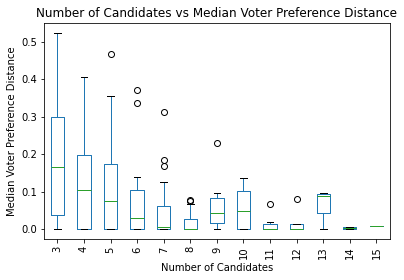

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'median_voter_distance'])
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15)]

# Create a box plot
plt.figure(figsize=(15, 10))
df_filtered.boxplot(column='median_voter_distance', by='#candidates', grid=False)

# Customize plot
plt.title('Number of Candidates vs Median Voter Preference Distance')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Number of Candidates')
plt.ylabel('Median Voter Preference Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show plot
plt.show()


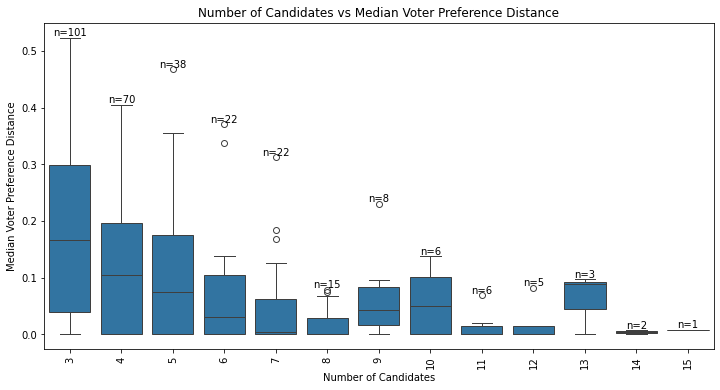

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'median_voter_distance'])

# Filter data for number of candidates > 2 and <= 15
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15)]

# Create a box plot
plt.figure(figsize=(12, 6))

# Plotting with seaborn to control the presence of outliers
import seaborn as sns
sns.boxplot(x='#candidates', y='median_voter_distance', data=df_filtered, showfliers=True)

grouped_data = df_filtered.groupby('#candidates')['median_voter_distance']
for i, (group_name, group_data) in enumerate(grouped_data):
    num_values = len(group_data)
    plt.text(i, group_data.max(), f'n={num_values}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Number of Candidates vs Median Voter Preference Distance')
plt.xlabel('Number of Candidates')
plt.ylabel('Median Voter Preference Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show plot
plt.show()


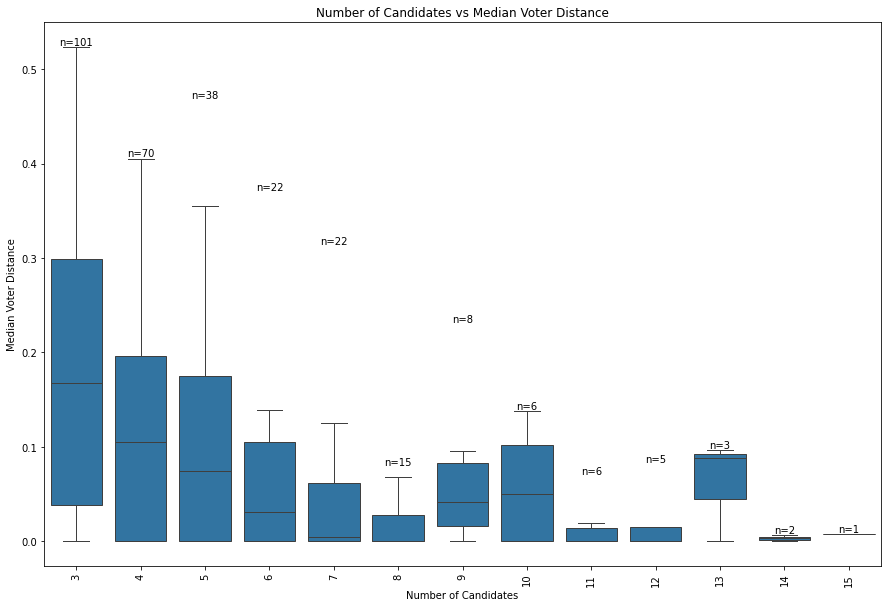

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'median_voter_distance'])

# Filter data for number of candidates > 2 and <= 15
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15) & (df['gamma'] < 1)]

# Create a box plot
plt.figure(figsize=(15, 10))

# Plotting with seaborn to control the presence of outliers
sns.boxplot(x='#candidates', y='median_voter_distance', data=df_filtered, showfliers=False)

# Annotate with number of values at each point
grouped_data = df_filtered.groupby('#candidates')['median_voter_distance']
for i, (group_name, group_data) in enumerate(grouped_data):
    num_values = len(group_data)
    plt.text(i, group_data.max(), f'n={num_values}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Number of Candidates vs Median Voter Distance')
plt.xlabel('Number of Candidates')
plt.ylabel('Median Voter Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show plot
plt.show()


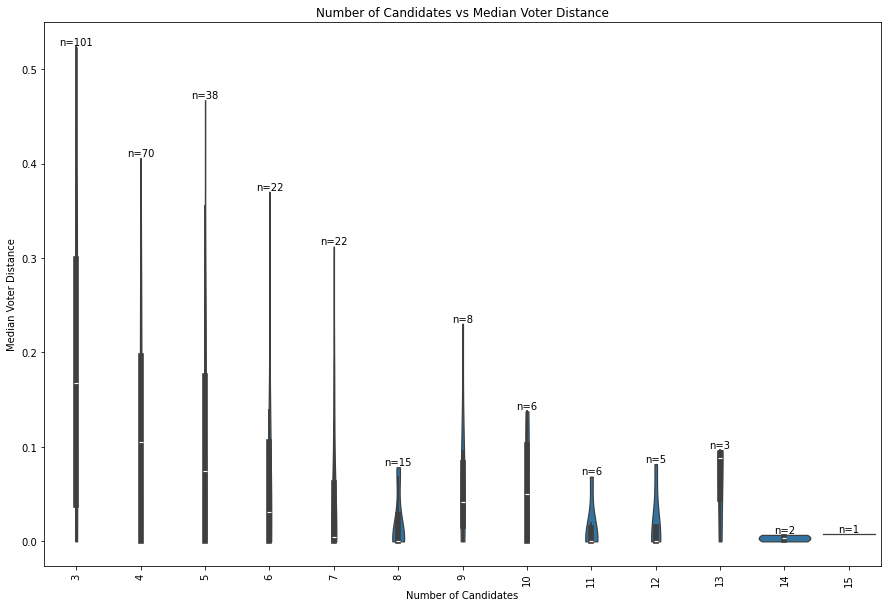

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'median_voter_distance'])
df = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15) & (df['gamma'] < 1)]

# Create a violin plot
plt.figure(figsize=(15, 10))

# Plotting a violin plot with seaborn
sns.violinplot(x='#candidates', y='median_voter_distance', data=df, cut=0)

# Annotate with number of values at each point
grouped_data = df.groupby('#candidates')['median_voter_distance']
for i, (group_name, group_data) in enumerate(grouped_data):
    num_values = len(group_data)
    plt.text(i, group_data.max(), f'n={num_values}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Number of Candidates vs Median Voter Distance')
plt.xlabel('Number of Candidates')
plt.ylabel('Median Voter Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show plot
plt.show()


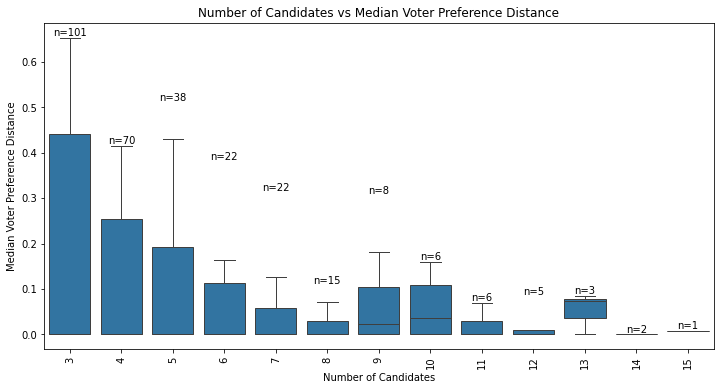

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'median_voter_preference_distance'])

# Filter data for number of candidates > 2 and <= 15
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15)]

# Create a box plot
plt.figure(figsize=(12, 6))

# Plotting with seaborn to control the presence of outliers
import seaborn as sns
sns.boxplot(x='#candidates', y='median_voter_preference_distance', data=df_filtered, showfliers=False)


grouped_data = df_filtered.groupby('#candidates')['median_voter_preference_distance']
for i, (group_name, group_data) in enumerate(grouped_data):
    num_values = len(group_data)
    plt.text(i, group_data.max(), f'n={num_values}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
    
# Customize plot
plt.title('Number of Candidates vs Median Voter Preference Distance')
plt.xlabel('Number of Candidates')
plt.ylabel('Median Voter Preference Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show plot
plt.show()


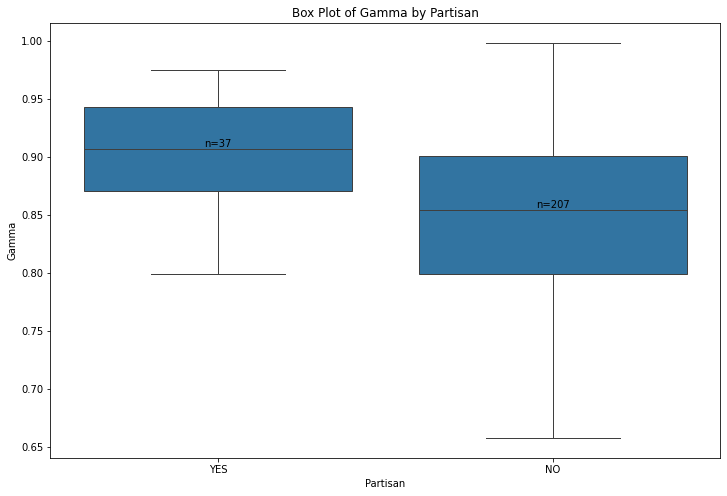

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['gamma', 'partisan'])
df = df[df['gamma'] < 1]

# Filter data for partisan == YES and NO
df_yes = df[df['partisan'] == 'YES']
df_no = df[df['partisan'] == 'NO']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting with seaborn without outliers
sns.boxplot(x='partisan', y='gamma', data=pd.concat([df_yes, df_no]), showfliers=False)

# Annotate with number of values at each point
# Calculate counts
counts_yes = df_yes.groupby('partisan').size().values[0]
counts_no = df_no.groupby('partisan').size().values[0]

# Annotate the plot with counts
plt.text(0, df_yes['gamma'].median(), f'n={counts_yes}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1, df_no['gamma'].median(), f'n={counts_no}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Box Plot of Gamma by Partisan')
plt.xlabel('Partisan')
plt.ylabel('Gamma')

# Show plot
plt.show()


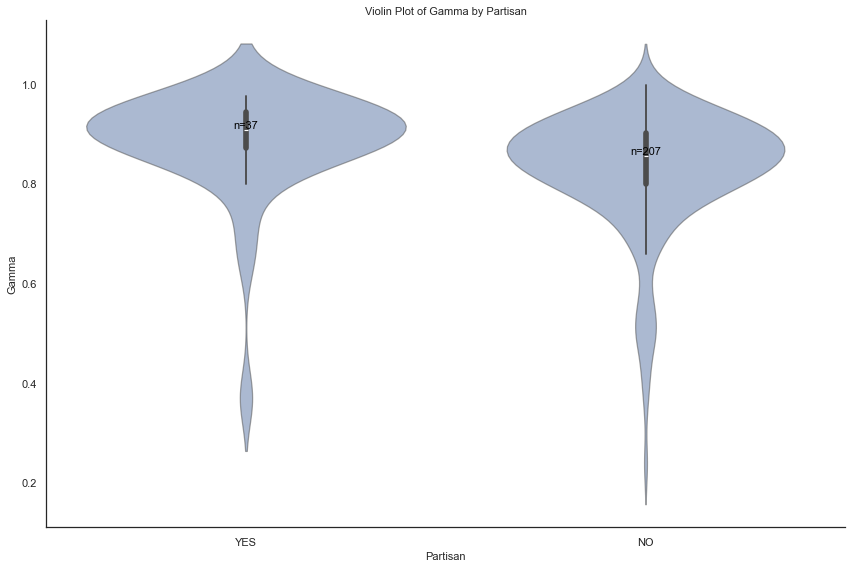

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['gamma', 'partisan'])
df = df[df['gamma'] < 1]

# Filter data to include only 'YES' and 'NO'
df_filtered = df[df['partisan'].isin(['YES', 'NO'])]

# Filter data for partisan == YES and NO
df_yes = df_filtered[df_filtered['partisan'] == 'YES']
df_no = df_filtered[df_filtered['partisan'] == 'NO']

# Set the plot style to white for a clean look
sns.set(style='white')

# Create a figure with a grid layout
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])  # Ratio of 2:1 for violin and box plot

# Create the top subplot for the violin plot
ax0 = plt.subplot(gs[0])
sns.violinplot(x='partisan', y='gamma', data=df_filtered, ax=ax0, alpha=0.5)  # Set transparency with alpha

# Annotate with number of values at each point for the violin plot
counts_yes = df_yes.shape[0]
counts_no = df_no.shape[0]

ax0.text(0, df_yes['gamma'].median(), f'n={counts_yes}', horizontalalignment='center', verticalalignment='bottom', fontsize=11, color='black')
ax0.text(1, df_no['gamma'].median(), f'n={counts_no}', horizontalalignment='center', verticalalignment='bottom', fontsize=11, color='black')

# Customize the top plot
ax0.set_title('Violin Plot of Gamma by Partisan', fontsize=11)
ax0.set_xlabel('Partisan', fontsize=11)
ax0.set_ylabel('Gamma', fontsize=11)
ax0.set_xticks([0, 1])  # Limit x-axis to the values 'YES' and 'NO'
ax0.set_xticklabels(['YES', 'NO'])

# Create the bottom subplot for the box plot
#ax1 = plt.subplot(gs[1])
#sns.boxplot(x='partisan', y='gamma', data=df_filtered, ax=ax1)

# Customize the bottom plot
"""ax1.set_title('Box Plot of Gamma by Partisan', fontsize=11)
ax1.set_xlabel('Partisan', fontsize=11)
ax1.set_ylabel('Gamma', fontsize=11)
ax1.set_xticks([0, 1])  # Limit x-axis to the values 'YES' and 'NO'
ax1.set_xticklabels(['YES', 'NO'])"""

# Remove the top and right spines (borders) for a cleaner look
sns.despine(ax=ax0, top=True, right=True)
#ns.despine(ax=ax1, top=True, right=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


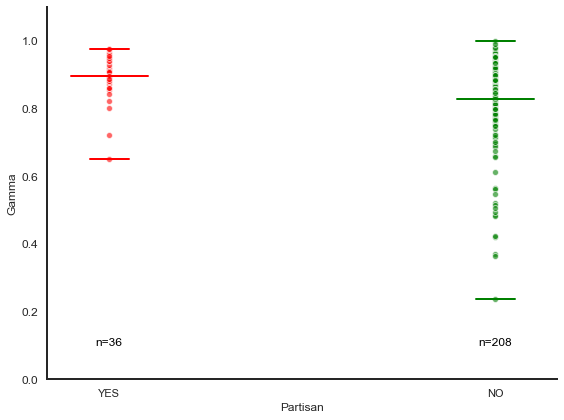

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['gamma', 'partisan'])
df = df[df['gamma'] < 1]

# Filter data to include only 'YES' and 'NO'
df_filtered = df[df['partisan'].isin(['YES', 'NO'])]

# Create a figure with a grid layout
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)  # Only one subplot needed

# Create the scatter plot with min, max, and mean lines
ax = plt.subplot(gs[0])

# Scatter plot for 'YES'
df_yes = df_filtered[df_filtered['partisan'] == 'YES']
ax.scatter([0] * df_yes.shape[0], df_yes['gamma'], color='red', alpha=0.6, label='YES', edgecolor='w')

# Scatter plot for 'NO'
df_no = df_filtered[df_filtered['partisan'] == 'NO']
ax.scatter([1] * df_no.shape[0], df_no['gamma'], color='green', alpha=0.6, label='NO', edgecolor='w')

# Add small bars for min, max, and mean
def add_summary_bars(ax, data, position, color):
    min_val = data['gamma'].min()
    max_val = data['gamma'].max()
    mean_val = data['gamma'].mean()
    
    ax.plot([position - 0.05, position + 0.05], [min_val, min_val], color=color, linestyle='-', linewidth=2)
    ax.plot([position - 0.05, position + 0.05], [max_val, max_val], color=color, linestyle='-', linewidth=2)
    ax.plot([position - 0.1, position + 0.1], [mean_val, mean_val], color=color, linestyle='-', linewidth=2)

add_summary_bars(ax, df_yes, 0, 'red')
add_summary_bars(ax, df_no, 1, 'green')

count_yes = df_yes.shape[0]
count_no = df_no.shape[0]

# Annotate with counts
ax.text(0, 0.1, f'n={count_yes}', horizontalalignment='center', fontsize=12, color='black')
ax.text(1, 0.1, f'n={count_no}', horizontalalignment='center', fontsize=12, color='black')

# Customize the plot
#ax.set_title('Scatter Plot of Gamma by Partisan with Summary Bars', fontsize=11)
ax.set_xlabel('Partisan', fontsize=12)
ax.set_ylabel('Gamma', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['YES', 'NO'])
ax.set_ylim(0, 1.1)


ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Increase font size of the y-axis numbers
ax.tick_params(axis='y', labelsize=12, width=2)
# Remove the top and right spines (borders) for a cleaner look
sns.despine(ax=ax, top=True, right=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


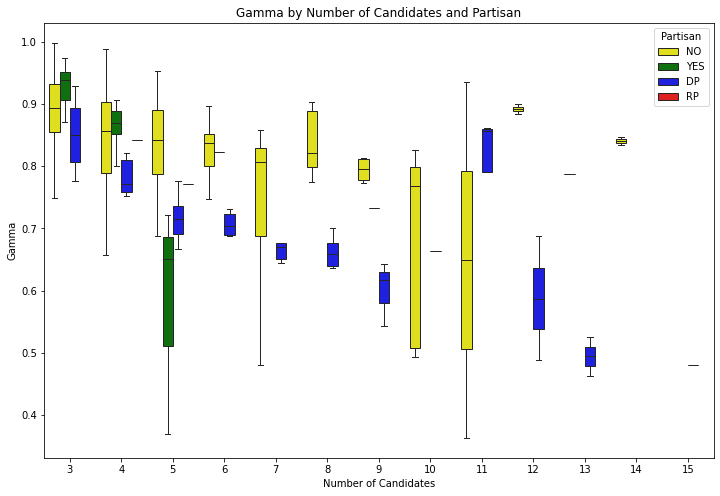

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'gamma', 'partisan'])

# Filter data for #candidates > 2 and <= 15 and only 'YES' and 'NO' partisan values
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15) & (df['partisan'].isin(['YES', 'NO', 'DP', 'RP']))]

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Define colors for YES and NO
colors = {'YES': 'green', 'NO': 'yellow', 'DP': 'blue', 'RP': 'red'}

# Plotting with seaborn
sns.boxplot(x='#candidates', y='gamma', hue='partisan', data=df_filtered, showfliers=False,
            palette=colors)

# Customize plot
plt.title('Gamma by Number of Candidates and Partisan')
plt.xlabel('Number of Candidates')
plt.ylabel('Gamma')
plt.legend(title='Partisan', loc='upper right')

# Show plot
plt.show()


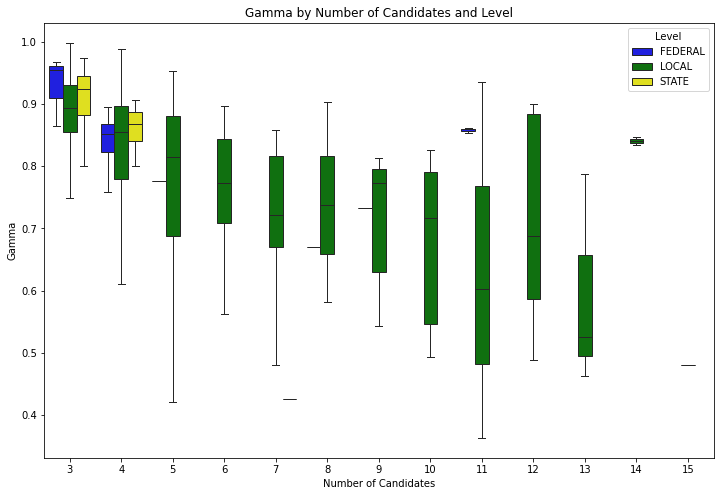

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'gamma', 'level'])

# Filter data for #candidates > 2 and <= 15 and only 'YES' and 'NO' partisan values
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15) & (df['level'].isin(['FEDERAL', 'LOCAL', 'STATE']))]

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Define colors for YES and NO
colors = {'FEDERAL': 'blue', 'LOCAL': 'green', 'STATE': 'yellow'}

# Plotting with seaborn
sns.boxplot(x='#candidates', y='gamma', hue='level', data=df_filtered, showfliers=False,
            palette=colors)

# Customize plot
plt.title('Gamma by Number of Candidates and Level')
plt.xlabel('Number of Candidates')
plt.ylabel('Gamma')
plt.legend(title='Level', loc='upper right')

# Show plot
plt.show()


C:\Users\mahsh\AppData\Local\Temp\ipykernel_3332\3824801391.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='gamma', loc='upper right')


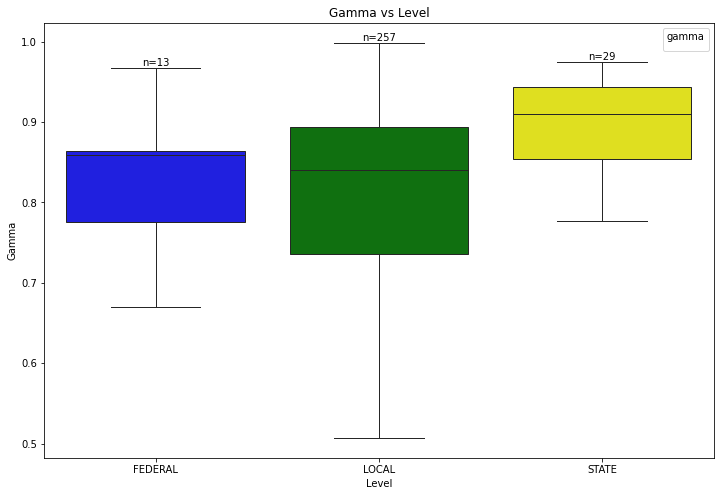

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'gamma', 'level'])

# Filter data for #candidates > 2 and <= 15 and only 'YES' and 'NO' partisan values
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15) & (df['level'].isin(['FEDERAL', 'LOCAL', 'STATE'])) & (df['gamma'] < 1)]

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Define colors for YES and NO
colors = {'FEDERAL': 'blue', 'LOCAL': 'green', 'STATE': 'yellow'}

# Plotting with seaborn
sns.boxplot(x='level', y='gamma', hue='level', data=df_filtered, showfliers=False,
            palette=colors)

df_federal = df_filtered[df_filtered['level'] == 'FEDERAL']
df_local = df_filtered[df_filtered['level'] == 'LOCAL']
df_state = df_filtered[df_filtered['level'] == 'STATE']

# Calculate counts
counts_federal = df_federal.groupby('level').size().values[0]
counts_local = df_local.groupby('level').size().values[0]
counts_state = df_state.groupby('level').size().values[0]

plt.text(0, df_federal['gamma'].max(), f'n={counts_federal}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1, df_local['gamma'].max(), f'n={counts_local}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(2, df_state['gamma'].max(), f'n={counts_state}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Gamma vs Level')
plt.xlabel('Level')
plt.ylabel('Gamma')
plt.legend(title='gamma', loc='upper right')

# Show plot
plt.show()


0.20217582124324324
0.0812035212995169


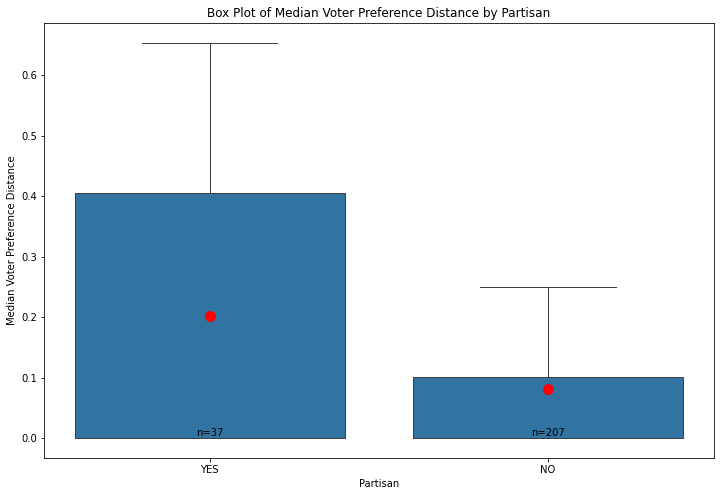

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['median_voter_preference_distance', 'partisan'])
df = df[df['gamma'] < 1]

# Filter data for partisan == YES and NO
df_yes = df[df['partisan'] == 'YES']
df_no = df[df['partisan'] == 'NO']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting with seaborn without outliers
ax = sns.boxplot(x='partisan', y='median_voter_preference_distance', data=pd.concat([df_yes, df_no]), showfliers=False)

# Calculate and print mean values
mean_yes = df_yes['median_voter_preference_distance'].mean()
mean_no = df_no['median_voter_preference_distance'].mean()
print(mean_yes)
print(mean_no)

# Annotate the plot with counts
counts_yes = df_yes.groupby('partisan').size().values[0]
counts_no = df_no.groupby('partisan').size().values[0]

plt.text(0, df_yes['median_voter_preference_distance'].median(), f'n={counts_yes}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1, df_no['median_voter_preference_distance'].median(), f'n={counts_no}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Overlay mean values on the box plot
ax.scatter(0, mean_yes, color='red', s=100, zorder=10, label='Mean' if 'Mean' not in ax.get_legend_handles_labels()[1] else "")
ax.scatter(1, mean_no, color='red', s=100, zorder=10)

# Add a legend for the mean
if 'Mean' not in ax.get_legend_handles_labels()[1]:
    ax.legend()

# Customize plot
plt.title('Box Plot of Median Voter Preference Distance by Partisan')
plt.xlabel('Partisan')
plt.ylabel('Median Voter Preference Distance')

# Show plot
plt.show()


0.22609665937837836
0.10137278518357488


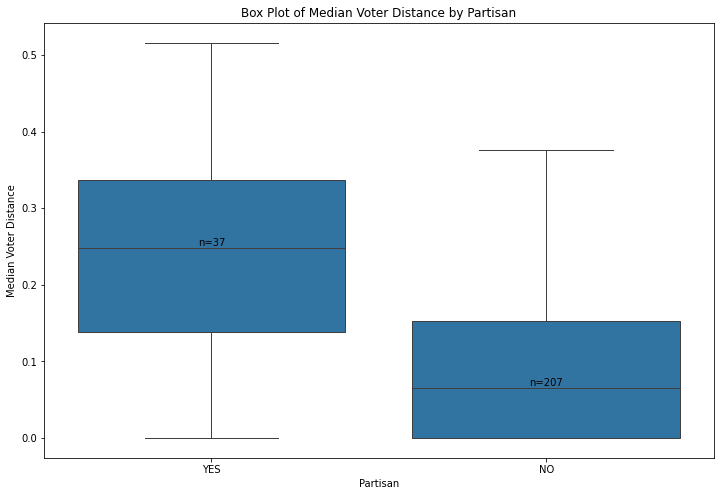

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['median_voter_distance', 'partisan'])
df = df[df['gamma'] < 1]

# Filter data for partisan == YES and NO
df_yes = df[df['partisan'] == 'YES']
df_no = df[df['partisan'] == 'NO']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting with seaborn without outliers
ax = sns.boxplot(x='partisan', y='median_voter_distance', data=pd.concat([df_yes, df_no]), showfliers=False)

# Calculate and print mean values
mean_yes = df_yes['median_voter_distance'].mean()
mean_no = df_no['median_voter_distance'].mean()
print(mean_yes)
print(mean_no)

# Annotate the plot with counts
counts_yes = df_yes.groupby('partisan').size().values[0]
counts_no = df_no.groupby('partisan').size().values[0]

plt.text(0, df_yes['median_voter_distance'].median(), f'n={counts_yes}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1, df_no['median_voter_distance'].median(), f'n={counts_no}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')


# Customize plot
plt.title('Box Plot of Median Voter Distance by Partisan')
plt.xlabel('Partisan')
plt.ylabel('Median Voter Distance')

# Show plot
plt.show()


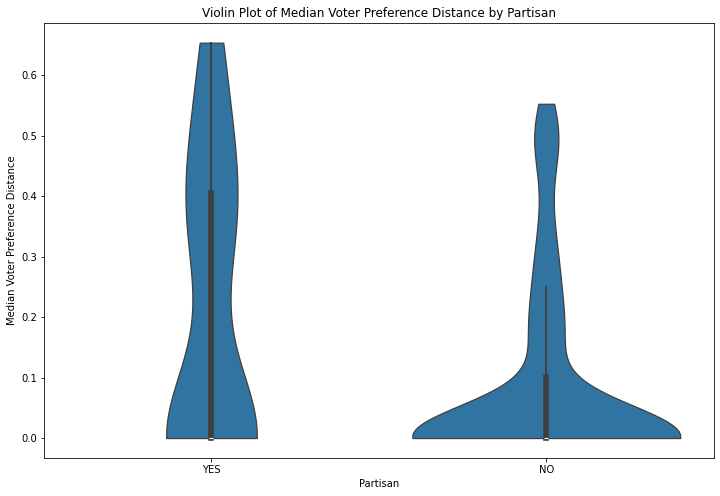

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['median_voter_preference_distance', 'partisan'])
df = df[df['gamma'] < 1]

# Filter data for partisan == YES and NO
df_yes = df[df['partisan'] == 'YES']
df_no = df[df['partisan'] == 'NO']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting a violin plot
sns.violinplot(x='partisan', y='median_voter_preference_distance', data=pd.concat([df_yes, df_no]), cut=0)

# Customize plot
plt.title('Violin Plot of Median Voter Preference Distance by Partisan')
plt.xlabel('Partisan')
plt.ylabel('Median Voter Preference Distance')

# Show plot
plt.show()


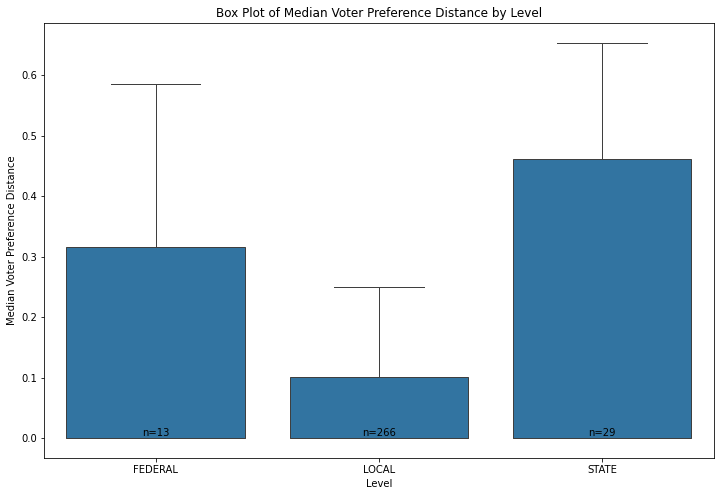

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['median_voter_preference_distance', 'level'])
df = df[df['gamma'] < 1]

# Filter data for partisan == YES and NO
df_federal = df[df['level'] == 'FEDERAL']
df_local = df[df['level'] == 'LOCAL']
df_state = df[df['level'] == 'STATE']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting with seaborn without outliers
sns.boxplot(x='level', y='median_voter_preference_distance', data=pd.concat([df_federal, df_local, df_state]), showfliers=False)

# Annotate with number of values at each point
# Calculate counts
counts_federal = df_federal.groupby('level').size().values[0]
counts_local = df_local.groupby('level').size().values[0]
counts_state = df_state.groupby('level').size().values[0]

# Annotate the plot with counts
plt.text(0, df_federal['median_voter_preference_distance'].median(), f'n={counts_federal}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1, df_local['median_voter_preference_distance'].median(), f'n={counts_local}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(2, df_state['median_voter_preference_distance'].median(), f'n={counts_state}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Box Plot of Median Voter Preference Distance by Level')
plt.xlabel('Level')
plt.ylabel('Median Voter Preference Distance')

# Show plot
plt.show()


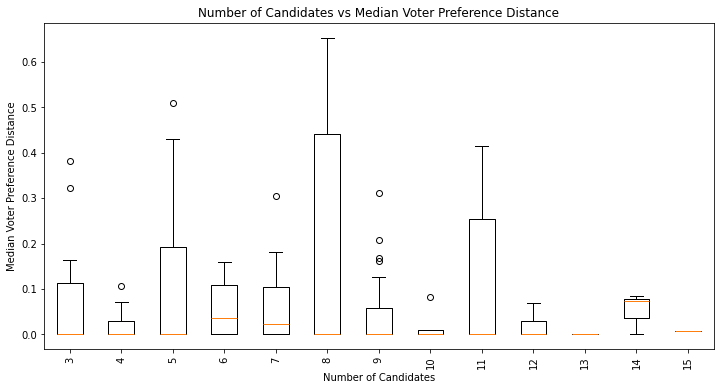

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = 'median_voter_analysis2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'median_voter_preference_distance'])

# Filter data for number of candidates > 2 and <= 15
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15)]

# Group by number of candidates and gather median voter preference distances
data = []
for group_name, group_df in df_filtered.groupby('#candidates'):
    data.append(group_df['median_voter_preference_distance'].values)

# Create a box plot
plt.figure(figsize=(12, 6))

# Customize the box plot to show outliers
plt.boxplot(data, positions=df_filtered['#candidates'].unique(), showfliers=True)

# Customize plot
plt.title('Number of Candidates vs Median Voter Preference Distance')
plt.xlabel('Number of Candidates')
plt.ylabel('Median Voter Preference Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show plot
plt.show()


Averaging The KDEs

In [27]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [11]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

Albany_11082022_FAKECityCouncil.csv   list index out of range


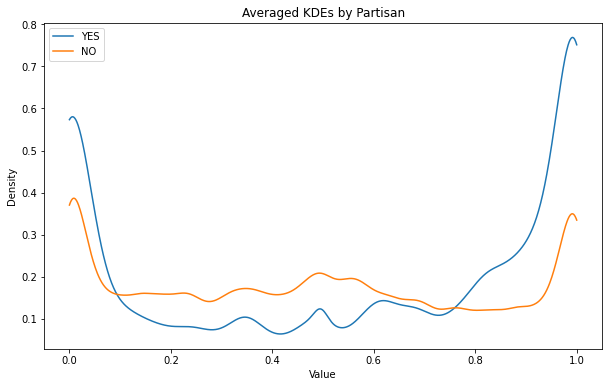

In [36]:
directory = "np_data_new"
df = pd.read_csv("median_voter_analysis.csv")
partisan_kdes = {'YES': [], 'NO': []}

for file in os.listdir(directory):
    try:
        filename = file[0:-4] + ".csv"
        if df.loc[df["filename"]==filename, "#candidates"].tolist()[0] > 2:
            data = np.load(os.path.join(directory, file))
        
            """if df.loc[df["filename"]==filename, "mirror"].tolist()[0] == 'YES':
                print(filename, df.loc[df["filename"]==filename, "mirror"].tolist()[0])
                max_value = np.max(data)
                data = max_value - data + 1"""

            data = normalize_data(data)
            # Calculate KDE

            kde = gaussian_kde(data, bw_method=0.1)
            x = np.linspace(np.min(data), np.max(data), 1000)
            kde_values = kde(x)

            # Normalize KDE values
            kde_values = normalize_data(kde_values)

            
            partisan = df.loc[df["filename"]==filename, "partisan"].tolist()[0]

            if partisan in partisan_kdes:
                partisan_kdes[partisan].append(kde_values)

    except Exception as e:
        print(filename, " " , e)

# Average the KDEs for each partisan group
averaged_kdes = {}
for key, kdes in partisan_kdes.items():
    if kdes:  # Avoid division by zero if list is empty
        averaged_kdes[key] = np.mean(kdes, axis=0)

# Plot the averaged KDEs
plt.figure(figsize=(10, 6))
for key, kde_values in averaged_kdes.items():
    plt.plot(x, kde_values, label=key)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Averaged KDEs by Partisan')
plt.legend()
plt.show()




c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
c:\Users\mahsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Albany_11082022_FAKECityCouncil.csv   list index out of range


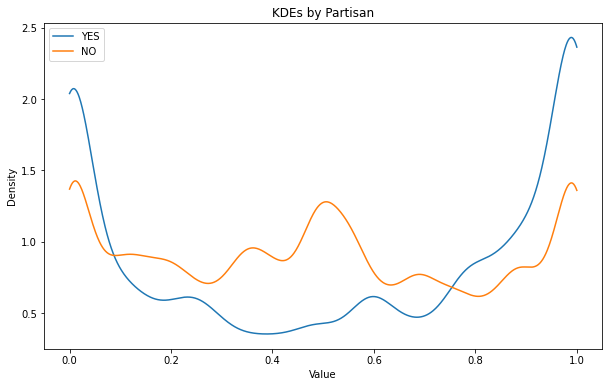

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

directory = "np_data_new"
df = pd.read_csv("median_voter_analysis.csv")
partisan_data = {'YES': [], 'NO': []}

for file in os.listdir(directory):
    try:
        filename = file[0:-4] + ".csv"
        if df.loc[df["filename"] == filename, "#candidates"].tolist()[0] > 2:
            data = np.load(os.path.join(directory, file))

            # Normalize the data
            data = normalize_data(data)

            partisan = df.loc[df["filename"] == filename, "partisan"].tolist()[0]
            if partisan in partisan_data:
                partisan_data[partisan].extend(data)  # Accumulate the normalized data

    except Exception as e:
        print(filename, " ", e)

# Calculate and plot KDEs for the accumulated data
plt.figure(figsize=(10, 6))

for key, data in partisan_data.items():
    if data:  # Check if there is data for the group
        kde = gaussian_kde(data, bw_method=0.1)
        x = np.linspace(np.min(data), np.max(data), 1000)
        kde_values = kde(x)
        plt.plot(x, kde_values, label=key)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDEs by Partisan')
plt.legend()
plt.show()


Albany_11082022_FAKECityCouncil.csv   list index out of range


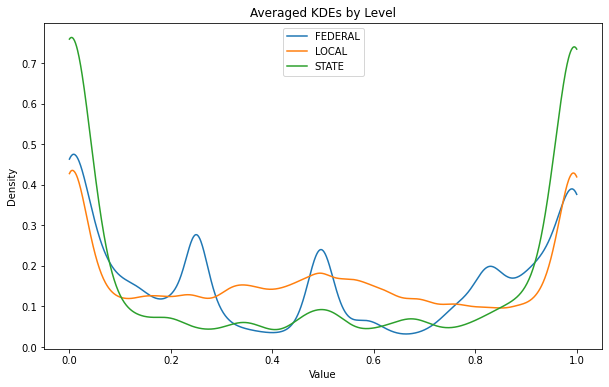

In [112]:
directory = "np_data_new"
df = pd.read_csv("median_voter_analysis2.csv")
level_kdes = {'FEDERAL': [], 'LOCAL': [], 'STATE': []}

for file in os.listdir(directory):
    try:
        data = np.load(os.path.join(directory, file))
        data = normalize_data(data)

        # Calculate KDE
        kde = gaussian_kde(data, bw_method=0.1)
        x = np.linspace(np.min(data), np.max(data), 1000)
        kde_values = kde(x)

        # Normalize KDE values
        kde_values = normalize_data(kde_values)

        filename = file[0:-4] + ".csv"
        level = df.loc[df["filename"]==filename, "level"].tolist()[0]

        if level in level_kdes:
            level_kdes[level].append(kde_values)

    except Exception as e:
        print(filename, " " , e)

# Average the KDEs for each partisan group
averaged_kdes = {}
for key, kdes in level_kdes.items():
    if kdes:  # Avoid division by zero if list is empty
        averaged_kdes[key] = np.mean(kdes, axis=0)

# Plot the averaged KDEs
plt.figure(figsize=(10, 6))
for key, kde_values in averaged_kdes.items():
    plt.plot(x, kde_values, label=key)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Averaged KDEs by Level')
plt.legend()
plt.show()




Albany_11082022_FAKECityCouncil.csv   list index out of range


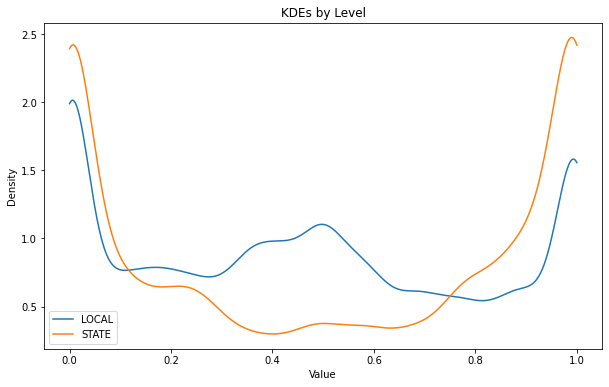

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

directory = "np_data_new"
df = pd.read_csv("median_voter_analysis2.csv")
level_data = {'LOCAL': [], 'STATE': []}

for file in os.listdir(directory):
    filename = file[0:-4] + ".csv"
    try:
        data = np.load(os.path.join(directory, file))
        data = normalize_data(data)

        filename = file[0:-4] + ".csv"
        level = df.loc[df["filename"] == filename, "level"].tolist()[0]
        if level == 'FEDERAL':
            level = 'STATE'
        if level in level_data:
            level_data[level].extend(data)  # Accumulate the normalized data

    except Exception as e:
        print(filename, " ", e)

# Calculate and plot KDEs for the accumulated data
plt.figure(figsize=(10, 6))

for key, data in level_data.items():
    if data:  # Check if there is data for the group
        kde = gaussian_kde(data, bw_method=0.1)
        x = np.linspace(np.min(data), np.max(data), 1000)
        kde_values = kde(x)
        plt.plot(x, kde_values, label=key)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDEs by Level')
plt.legend()
plt.show()


In [1]:
plt.figure(figsize=(10, 6))

for key, data in level_data.items():
    if data:  # Check if there is data for the group
        kde = gaussian_kde(data, bw_method=0.1)
        x = np.linspace(np.min(data), np.max(data), 1000)
        kde_values = kde(x)
        if key == 'STATE':
            key = 'FEDERAL/STATE'
        plt.plot(x, kde_values, label=key)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDEs by Level')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

Albany_11082022_FAKECityCouncil.csv   list index out of range


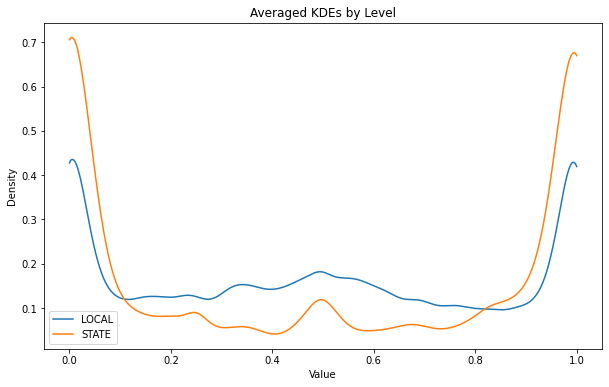

In [15]:
directory = "np_data_new"
df = pd.read_csv("median_voter_analysis2.csv")
level_kdes = {'LOCAL': [], 'STATE': []}

for file in os.listdir(directory):
    filename = file[0:-4] + ".csv"
    try:
        data = np.load(os.path.join(directory, file))
        data = normalize_data(data)

        # Calculate KDE
        kde = gaussian_kde(data, bw_method=0.1)
        x = np.linspace(np.min(data), np.max(data), 1000)
        kde_values = kde(x)

        # Normalize KDE values
        kde_values = normalize_data(kde_values)

        filename = file[0:-4] + ".csv"
        level = df.loc[df["filename"]==filename, "level"].tolist()[0]
        if level == 'FEDERAL':
            level = 'STATE'
        if level in level_kdes:
            level_kdes[level].append(kde_values)

    except Exception as e:
        print(filename, " " , e)

# Average the KDEs for each partisan group
averaged_kdes = {}
for key, kdes in level_kdes.items():
    if kdes:  # Avoid division by zero if list is empty
        averaged_kdes[key] = np.mean(kdes, axis=0)

# Plot the averaged KDEs
plt.figure(figsize=(10, 6))
for key, kde_values in averaged_kdes.items():
    plt.plot(x, kde_values, label=key)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Averaged KDEs by Level')
plt.legend()
plt.show()




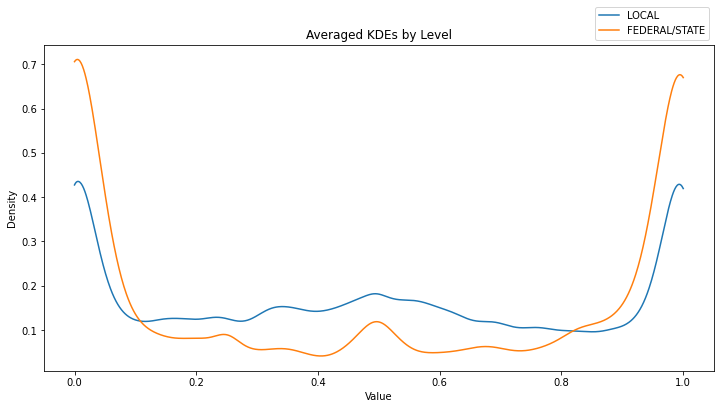

In [26]:
# Plot the averaged KDEs
plt.figure(figsize=(12, 6))
for key, kde_values in averaged_kdes.items():
    label = key
    if key == "FEDERAL" or key == "STATE":
        label = "FEDERAL/STATE"
    plt.plot(x, kde_values, label=label)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Averaged KDEs by Level')
plt.legend(bbox_to_anchor=(1, 1), loc='lower right')
plt.show()